In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
#패키지 import
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 설치
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 데이터 업로드, 전처리


In [ ]:
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')

In [ ]:
df = df.set_index('관측일시')#인덱스로 설정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가뭄(MSWSI)   626 non-null    float64
 1   가뭄(SPI6)    626 non-null    float64
 2   평균 저수율      626 non-null    float64
 3   평균 용수공급량    626 non-null    float64
 4   평균 강우량      626 non-null    float64
 5   평균기온        626 non-null    float64
 6   평균 유입량-뱡류량  626 non-null    float64
dtypes: float64(7)
memory usage: 39.1+ KB


In [ ]:
df.head(10)

,가뭄(MSWSI),가뭄(SPI6),평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,,,
2013-01-05,0.0,0.0,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,-0.5,0.0,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,0.0,0.0,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,0.0,0.0,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,0.5,0.0,43.671429,0.718286,2.076014,-0.828571,-0.222714
2013-02-09,0.0,1.0,44.371429,0.610286,1.276543,-5.642857,0.115857
2013-02-16,0.0,0.0,43.857143,0.622429,0.000000,-4.628571,-0.216714
2013-02-23,-0.5,0.0,42.514286,0.642571,0.066843,-3.414286,-0.320857
2013-03-02,-0.5,0.0,41.028571,0.655429,0.142857,0.828571,-0.198429


In [ ]:
#데이터 분리
target=['가뭄(MSWSI)','가뭄(SPI6)']
X=df.drop(target,axis=1)
y=df[target]
display(X)
display(y)

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2013-01-05,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,43.671429,0.718286,2.076014,-0.828571,-0.222714
...,...,...,...,...,...
2024-11-30,68.400000,0.358571,1.304057,0.885714,-0.131571
2024-12-07,67.742857,0.373571,0.000000,0.942857,-0.177857
2024-12-14,66.757143,0.388429,0.000000,-2.257143,-0.230429


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,0.0,0.0
2013-01-12,-0.5,0.0
2013-01-19,0.0,0.0
2013-01-26,0.0,0.0
2013-02-02,0.5,0.0
...,...,...
2024-11-30,0.5,0.0
2024-12-07,0.0,0.0
2024-12-14,-0.5,0.0


In [ ]:
y[target] = y[target].replace({ 2: '1', 1.5: '1', 1: '1', 0.5: '1',0: '0', -0.5: '-1', -1: '-1', -1.5: '-1', -2: '-1'})
y[target] = y[target].astype('category')
display(y[target])
y.info()

/tmp/ipython-input-4041230017.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y[target] = y[target].replace({ 2: '1', 1.5: '1', 1: '1', 0.5: '1',0: '0', -0.5: '-1', -1: '-1', -1.5: '-1', -2: '-1'})
/tmp/ipython-input-4041230017.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y[target] = y[target].replace({ 2: '1', 1.5: '1', 1: '1', 0.5: '1',0: '0', -0.5: '-1', -1: '-1', -1.5: '-1', -2: '-1'})
/tmp/ipython-input-4041230017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,0,0
2013-01-12,-1,0
2013-01-19,0,0
2013-01-26,0,0
2013-02-02,1,0
...,...,...
2024-11-30,1,0
2024-12-07,0,0
2024-12-14,-1,0


<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   가뭄(MSWSI)  626 non-null    category
 1   가뭄(SPI6)   626 non-null    category
dtypes: category(2)
memory usage: 6.4+ KB


In [ ]:
#train, test 데이터 나누기
test_size = 52#24년(1년치) 데이터 개수
X_train, X_test = X[:-test_size], X[-test_size:]#독립변수 분할
y_train, y_test = y[:-test_size], y[-test_size:]#종속변수 분할
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(574, 5)
(52, 5)
(574, 2)
(52, 2)


In [ ]:
display(X_train.tail(5))
display(y_train.tail(5))
display(X_test.head(5))
display(y_test.head(5))

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,63.257143,0.381286,0.352557,-1.728571,-0.291000
2023-12-09,61.942857,0.381571,0.847971,2.757143,-0.257857
2023-12-16,70.014286,0.372143,19.862429,1.700000,2.564429
2023-12-23,65.414286,0.397714,0.000000,-10.214286,-2.223857
2023-12-30,63.257143,0.411429,0.285714,-3.371429,0.061000


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2023-12-02,-1,0
2023-12-09,0,0
2023-12-16,1,1
2023-12-23,1,1
2023-12-30,1,1


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,63.128571,0.401714,1.267371,-0.700000,0.038000
2024-01-13,62.571429,0.400429,0.000000,-3.842857,-0.048429
2024-01-20,61.828571,0.392143,5.513757,-1.100000,-0.154286
2024-01-27,61.000000,0.405857,0.142857,-8.471429,-0.118571
2024-02-03,60.042857,0.423429,0.276543,-3.000000,-0.167286


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2024-01-06,0,1
2024-01-13,0,0
2024-01-20,1,0
2024-01-27,0,0
2024-02-03,-1,0


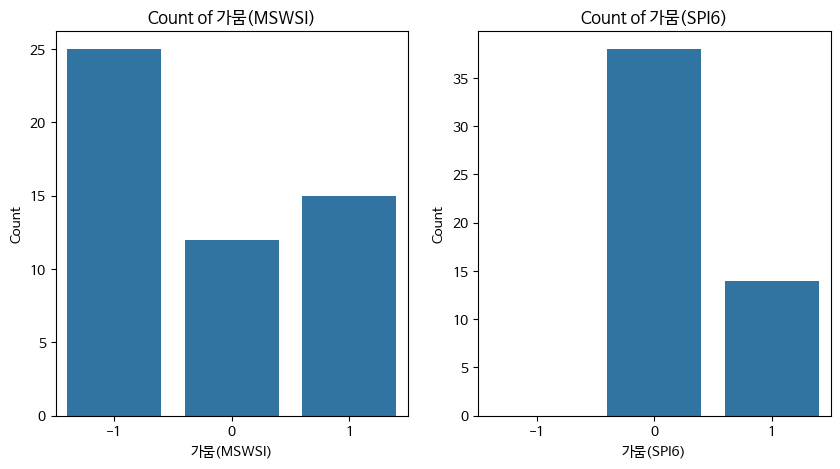

In [ ]:
#종속변수 데이터 확인(이상치 확인)
plt.figure(figsize=(10, 5))
drought=["가뭄(MSWSI)", "가뭄(SPI6)"]#범주형 변수
for i, col in enumerate(drought, 1):
  plt.subplot(1, 2, i)  # 1행 2열 배치
  sns.countplot(x=y_test[col])
  plt.title(f"Count of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
plt.show()

In [ ]:
#스케일러 적용
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)#test는 fit하지 않습니다(데이터누수 때문에)

#dataframe으로 변환
X_train_robust   = pd.DataFrame(X_train_robust, columns=X_train.columns, index=X_train.index)
X_test_robust    = pd.DataFrame(X_test_robust, columns=X_test.columns, index=X_test.index)

In [ ]:
#스케일러 적용확인
display(X_train_robust.tail(5))
display(X_test_robust.head(5))


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,-0.863659,0.140671,-0.196367,-0.702542,-0.511178
2023-12-09,-1.050177,0.143586,-0.064407,-0.436441,-0.411436
2023-12-16,0.095286,0.047376,5.000342,-0.499153,8.082115
2023-12-23,-0.557527,0.308309,-0.290275,-1.205932,-6.328031
2023-12-30,-0.863659,0.448251,-0.214171,-0.800000,0.548151


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,-0.881906,0.349125,0.047306,-0.641525,0.478934
2024-01-13,-0.960973,0.336006,-0.290275,-0.827966,0.218831
2024-01-20,-1.066396,0.251458,1.178386,-0.665254,-0.099742
2024-01-27,-1.183984,0.391399,-0.252223,-1.102542,0.007739
2024-02-03,-1.319818,0.570700,-0.216614,-0.777966,-0.138865


# 변수설명
X_train=독립변수 훈련데이터\
X_test=독립변수 테스트데이터\
y_test=종속변수 테스트데이터(원핫인코딩x)\
y_train=종속변수 훈련데이터(원핫인코딩x)\
encoded_y_trian=종속변수 테스트데이터(원핫인코딩o)\
encoded_y_test=종속변수 테스트데이터(원핫인코딩o)\
=================================================\
훈련데이터는 X_train_robust,encoded_y_train 사용\
테스트 데이터는 X_test_robust,encoded_y_test 사용\
시계열데이터셋\
X_train_win_mswsi\
y_train_win_mswsi\
X_test_win_mswsi\
y_test_win_mswsi\
X_train_win_spi\
y_train_win_spi\
X_test_win_spi\
y_test_win_spi

In [ ]:
#라벨인코딩(원핫 사요안하기로 함)

# MSWSI용 encoder
le_mswsi = LabelEncoder()
y_train_mswsi = le_mswsi.fit_transform(y_train['가뭄(MSWSI)'])
y_test_mswsi  = le_mswsi.transform(y_test['가뭄(MSWSI)'])

# SPI6용 encoder
le_spi = LabelEncoder()
y_train_spi = le_spi.fit_transform(y_train['가뭄(SPI6)'])
y_test_spi  = le_spi.transform(y_test['가뭄(SPI6)'])


In [ ]:

# 시계열 데이터셋 구성(슬라이딩 윈도우)_종속변수의 이전시점 데이터 안 넣은 버전
s=16#데이터셋 단위
def make_xy_windows(X, y, time_step=s, horizon=1):#s주 단위, 그 다음주 예측
    X = np.asarray(X)
    y = np.asarray(y)
    Xs, Ys = [], []
    for i in range(len(X) - time_step - horizon + 1):
        Xs.append(X[i : i + time_step])
        Ys.append(y[i + time_step + horizon - 1])
    return np.array(Xs), np.array(Ys)

# 사용 예시
X_train_win_mswsi, y_train_win_mswsi = make_xy_windows(X_train, y_train_mswsi, time_step=s, horizon=1)#종속변수 mswsi 훈련 데이터의 슬라이딩 윈도우
X_test_win_mswsi, y_test_win_mswsi = make_xy_windows(X_test, y_test_mswsi, time_step=s, horizon=1)#종속변수 mswsi 테스트 데이터의 슬라이딩 윈도우
X_train_win_spi, y_train_win_spi = make_xy_windows(X_train, y_train_spi, time_step=s, horizon=1)#종속변수 spi 훈련 데이터의 슬라이딩 윈도우
X_test_win_spi, y_test_win_spi = make_xy_windows(X_test, y_test_spi, time_step=s, horizon=1)#종속변수 spi 테스트 데이터의 슬라이딩 윈도우
print(X_train_win_mswsi.shape)  # (샘플수, 4, 특성수)
print(y_train_win_mswsi.shape)  # (샘플수, ...)
print(X_test_win_mswsi.shape)
print(y_test_win_mswsi.shape)
print(X_train_win_spi.shape)
print(y_train_win_spi.shape)
print(X_test_win_spi.shape)
print(y_test_win_spi.shape)



(558, 16, 5)
(558,)
(36, 16, 5)
(36,)
(558, 16, 5)
(558,)
(36, 16, 5)
(36,)


In [ ]:
"""
#이전시점
#  Train 윈도우
def make_train_windows_with_y_lag(X, y_idx, time_step=12, horizon=1):
    X = np.asarray(X)
    y_idx = np.asarray(y_idx).reshape(-1,)
    N, F = X.shape

    Xs, Ys = [], []
    for i in range(N - time_step - horizon + 1):
        x_win  = X[i : i + time_step, :]                 # (T, F)
        y_lag  = y_idx[i : i + time_step].reshape(-1, 1) # (T, 1)
        x_aug  = np.concatenate([x_win, y_lag], axis=1)  # (T, F+1)
        y_tgt  = y_idx[i + time_step + horizon - 1]
        Xs.append(x_aug); Ys.append(y_tgt)
    return np.asarray(Xs), np.asarray(Ys)

# Test 윈도우
#첫 윈도우의 y-lag는 train 마지막 time_step으로
#이후는 y_test 실제값을 이어붙임
def make_test_windows_with_y_lag_eval(X_test, y_train_idx, y_test_idx, time_step=12, horizon=1):
    X_test      = np.asarray(X_test)
    y_train_idx = np.asarray(y_train_idx).reshape(-1,)
    y_test_idx  = np.asarray(y_test_idx).reshape(-1,)

    # 시드 시퀀스: train tail + test 실제값
    y_seed = np.concatenate([y_train_idx[-time_step:], y_test_idx])

    # 만들 수 있는 윈도우 개수
    Lx = len(X_test)
    Ly = len(y_test_idx)
    n_win = min(Lx - time_step, Ly - horizon) + 1
    if n_win <= 0:
        return np.empty((0, time_step, X_test.shape[1] + 1)), np.empty((0,), dtype=int)

    Xs, Ys = [], []
    for t in range(n_win):
        x_win = X_test[t : t + time_step, :]               # (T, F)
        y_lag = y_seed[t : t + time_step].reshape(-1, 1)   # (T, 1)
        x_aug = np.concatenate([x_win, y_lag], axis=1)     # (T, F+1)
        y_tgt = y_test_idx[t + horizon - 1]
        Xs.append(x_aug); Ys.append(y_tgt)
    return np.asarray(Xs), np.asarray(Ys)


time_step = 8
horizon   = 1

# Train windows
X_train_win_mswsi, y_train_win_mswsi = make_train_windows_with_y_lag(
    X_train_robust.values, y_train_mswsi, time_step, horizon
)
X_train_win_spi,   y_train_win_spi   = make_train_windows_with_y_lag(
    X_train_robust.values, y_train_spi, time_step, horizon
)

# Test windows
X_test_win_mswsi, y_test_win_mswsi = make_test_windows_with_y_lag_eval(
    X_test_robust.values, y_train_mswsi, y_test_mswsi, time_step, horizon
)
X_test_win_spi,   y_test_win_spi   = make_test_windows_with_y_lag_eval(
    X_test_robust.values, y_train_spi, y_test_spi, time_step, horizon
)

print("MSWSI:", X_train_win_mswsi.shape, y_train_win_mswsi.shape,
      " | test:", X_test_win_mswsi.shape, y_test_win_mswsi.shape)
print("SPI6 :", X_train_win_spi.shape, y_train_win_spi.shape,
      " | test:", X_test_win_spi.shape, y_test_win_spi.shape)
"""


SyntaxError: incomplete input (ipython-input-2896251040.py, line 1)

# RNN(종속변수 1개씩)

In [ ]:
n_classes = len(np.unique(y_train_mswsi))

model = Sequential()
model.add(SimpleRNN(128,input_shape=(X_train_win_mswsi.shape[1], X_train_win_mswsi.shape[2]),activation='tanh', return_sequences=True))# RNN
#model.add(SimpleRNN(64, activation='tanh', return_sequences=True))
model.add(SimpleRNN(128, activation='tanh', return_sequences=False))
model.add(Dense(n_classes, activation='softmax'))  # 출력층

model.compile(
    optimizer=RMSprop(learning_rate=0.00005),
    loss='sparse_categorical_crossentropy',  # 정수 라벨이면 sparse 사용
    metrics=['accuracy']
)

model.summary()

# 가장 val_loss가 낮을 때 가중치 저장
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True, verbose=1)

history = model.fit(X_train_win_mswsi, y_train_win_mswsi,validation_data=(X_test_win_mswsi, y_test_win_mswsi),
                    epochs=50,
                    batch_size=64,
                    callbacks=[checkpoint, earlystop],
                    verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_17 (SimpleRNN)       │ (None, 4, 128)         │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_18 (SimpleRNN)       │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,435 (197.01 KB)

 Trainable params: 50,435 (197.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.1562 - loss: 1.5820
Epoch 1: val_loss improved from inf to 0.99408, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.3543 - loss: 1.4223 - val_accuracy: 0.5417 - val_loss: 0.9941
Epoch 2/50
7/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5530 - loss: 1.0735 
Epoch 2: val_loss did not improve from 0.99408
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5522 - loss: 1.0656 - val_accuracy: 0.5208 - val_loss: 1.0017
Epoch 3/50
6/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5723 - loss: 0.9646
Epoch 3: val_loss did not improve from 0.99408
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5631 - loss: 0.9682 - val_accuracy: 0.5208 - val_loss: 1.0389
Epoch 4/50
7/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5525 - loss: 0.9465  
Epoch 4: val_loss did not improve from 0.99408
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5534 - loss: 0.9468 - val_accuracy: 0.5208 - val_lo

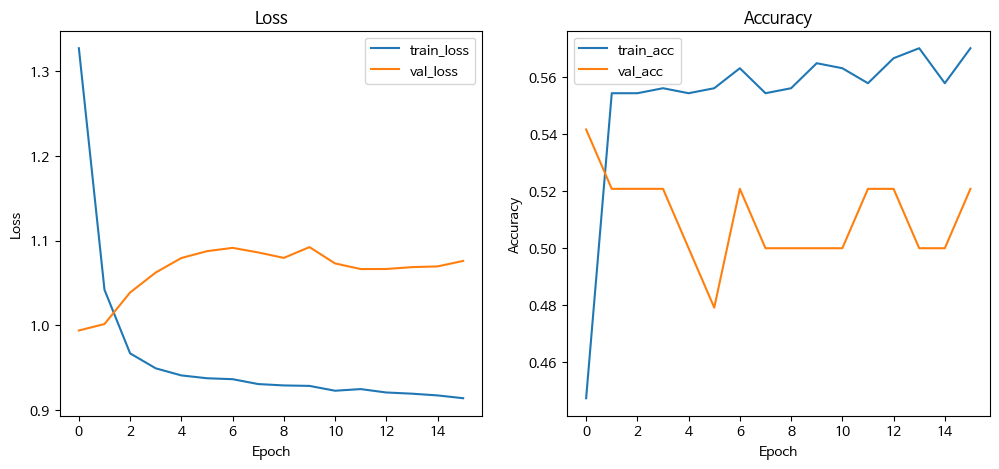

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        25
           1       0.00      0.00      0.00         9
           2       1.00      0.07      0.13        14

    accuracy                           0.54        48
   macro avg       0.51      0.36      0.28        48
weighted avg       0.57      0.54      0.40        48



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 예측
y_pred_prob = model.predict(X_test_win_mswsi)
y_pred = np.argmax(y_pred_prob, axis=1)

# 분류 리포트
print(classification_report(y_test_win_mswsi, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


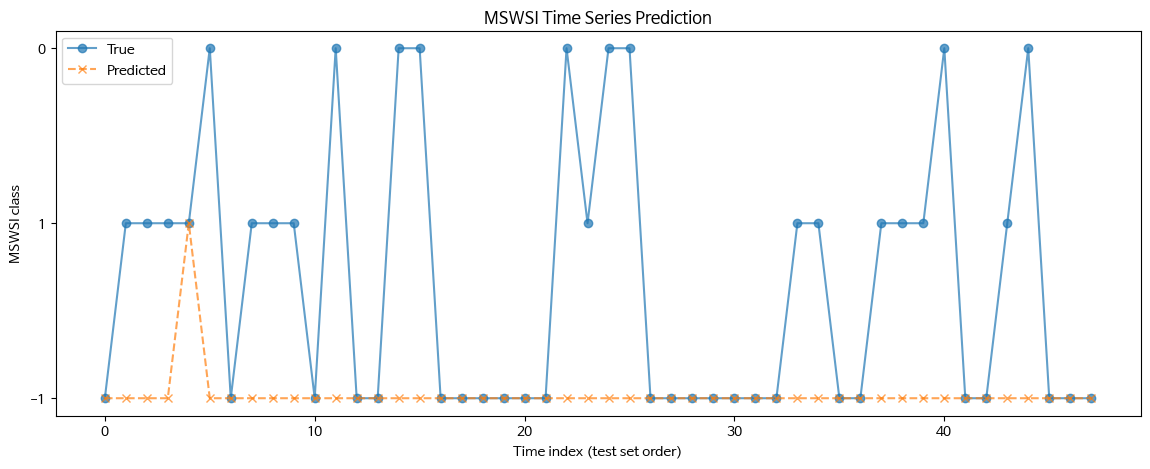

In [ ]:

# 예측
y_pred_prob = model.predict(X_test_win_mswsi)
y_pred = y_pred_prob.argmax(axis=1)        # 클래스 인덱스

# LabelEncoder를 사용했다면 원래 값 복원
y_test_orig = le_mswsi.inverse_transform(y_test_win_mswsi)
y_pred_orig = le_mswsi.inverse_transform(y_pred)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,5))
plt.plot(y_test_orig, label='True', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_orig, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('MSWSI Time Series Prediction')
plt.xlabel('Time index (test set order)')
plt.ylabel('MSWSI class')
plt.legend()
plt.show()


In [ ]:
#SPI6
n_classes = len(np.unique(y_train_spi))

model = Sequential()
model.add(SimpleRNN(128,input_shape=(X_train_win_mswsi.shape[1], X_train_win_mswsi.shape[2]),activation='tanh', return_sequences=True))# RNN
model.add(SimpleRNN(128, activation='tanh', return_sequences=True))
model.add(SimpleRNN(128, activation='tanh', return_sequences=False))
model.add(Dense(n_classes, activation='softmax'))  # 출력층

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # 정수 라벨이면 sparse 사용
    metrics=['accuracy']
)

model.summary()

# 가장 val_loss가 낮을 때 가중치 저장
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True, verbose=1)

history = model.fit(X_train_win_spi, y_train_win_spi,validation_data=(X_test_win_spi, y_test_win_spi),
                    epochs=50,
                    batch_size=64,
                    callbacks=[checkpoint, earlystop],
                    verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)       │ (None, 4, 128)         │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_13 (SimpleRNN)       │ (None, 4, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_14 (SimpleRNN)       │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,331 (325.51 KB)

 Trainable params: 83,331 (325.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7331 - loss: 0.7832
Epoch 1: val_loss improved from inf to 0.99550, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.7391 - loss: 0.7689 - val_accuracy: 0.7292 - val_loss: 0.9955
Epoch 2/50
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7734 - loss: 0.6200 
Epoch 2: val_loss did not improve from 0.99550
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7738 - loss: 0.6170 - val_accuracy: 0.7292 - val_loss: 1.0969
Epoch 3/50
7/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7585 - loss: 0.6659 
Epoch 3: val_loss did not improve from 0.99550
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7638 - loss: 0.6466 - val_accuracy: 0.7292 - val_loss: 1.1790
Epoch 4/50
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7692 - loss: 0.5653 
Epoch 4: val_loss improved from 0.99550 to 0.82452, saving model to best_model.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7704 - loss: 0.

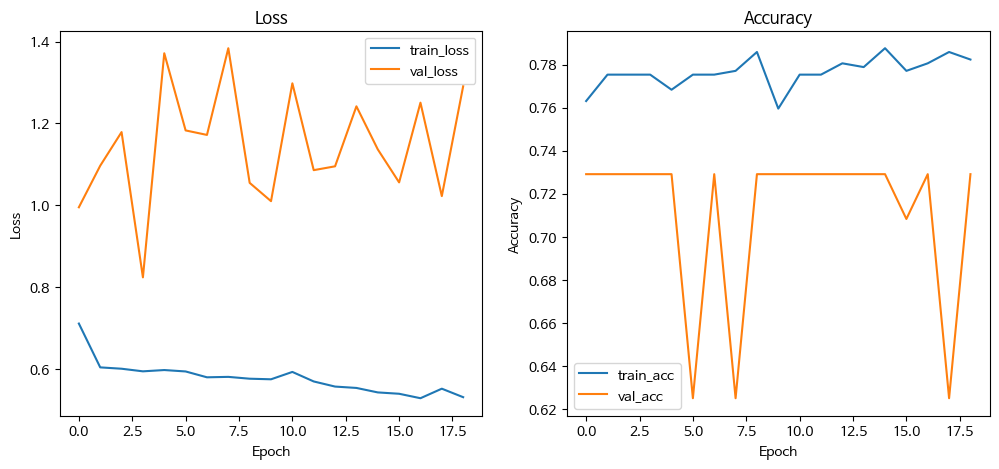

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
              precision    recall  f1-score   support

           1       0.73      1.00      0.84        35
           2       0.00      0.00      0.00        13

    accuracy                           0.73        48
   macro avg       0.36      0.50      0.42        48
weighted avg       0.53      0.73      0.61        48



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 예측
y_pred_prob = model.predict(X_test_win_spi)
y_pred = np.argmax(y_pred_prob, axis=1)

# 분류 리포트
print(classification_report(y_test_win_spi, y_pred))



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


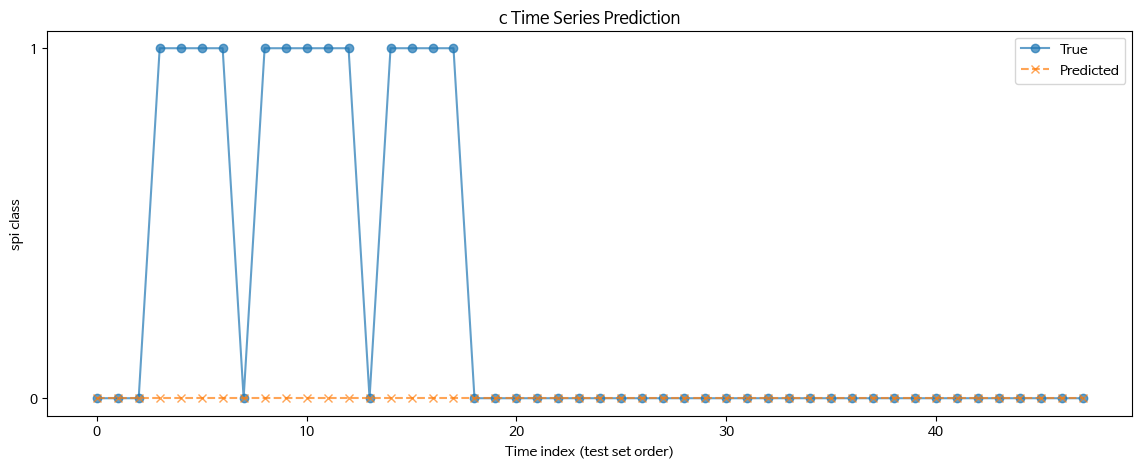

In [ ]:
# 예측
y_pred_prob = model.predict(X_test_win_spi)
y_pred = y_pred_prob.argmax(axis=1)        # 클래스 인덱스

# LabelEncoder를 사용했다면 원래 값 복원
y_test_orig = le_spi.inverse_transform(y_test_win_spi)
y_pred_orig = le_spi.inverse_transform(y_pred)

plt.figure(figsize=(14,5))
plt.plot(y_test_orig, label='True', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_orig, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('c Time Series Prediction')
plt.xlabel('Time index (test set order)')
plt.ylabel('spi class')
plt.legend()
plt.show()



# 가중치 조정 추가_MSWSI



In [ ]:
#가중치 확인_mswsi(학습시 가중치적용)

classes = np.unique(y_train_win_mswsi)#훈련 데이터에 실제로 등장한 클래스 라벨 집합 추출
weights = compute_class_weight(class_weight='balanced',classes=classes, y=y_train_win_mswsi)#클래스별 가중치 계산
class_weight_mswsi = {int(c): float(w) for c, w in zip(classes, weights)}#{클래스: 가중치} 딕셔너리 형태로 변환

print("MSWSI 클래스별 가중치:", class_weight_mswsi)


MSWSI 클래스별 가중치: {0: 0.5942492012779552, 1: 1.0568181818181819, 2: 2.6956521739130435}


In [ ]:
#가중치 추가한 모델

# Train/Validation 분리

val_size = int(len(X_train_win_mswsi) * 0.2)  # 예: 20%를 검증용
X_tr, y_tr = X_train_win_mswsi[:-val_size], y_train_win_mswsi[:-val_size]
X_val, y_val = X_train_win_mswsi[-val_size:], y_train_win_mswsi[-val_size:]


#모델 정의

n_classes = len(np.unique(y_train_win_mswsi))
node = 512

model = Sequential()
model.add(SimpleRNN(node, input_shape=(X_train_win_mswsi.shape[1], X_train_win_mswsi.shape[2]), activation='tanh', return_sequences=True))
#model.add(SimpleRNN(node, activation='tanh', return_sequences=True))
model.add(SimpleRNN(node, activation='tanh', return_sequences=False))
model.add(Dense(node, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0003),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)


#학습 (검증은 train에서 분리한 val 사용)
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[checkpoint, earlystop],
    class_weight=class_weight_mswsi,   # 클래스별 가중치
    verbose=1,
    shuffle=False                      # 시계열이므로 섞지 않음
)

# 최종 테스트 평가

test_loss, test_acc = model.evaluate(X_test_win_mswsi, y_test_win_mswsi, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_170 (SimpleRNN)      │ (None, 16, 512)        │       265,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_171 (SimpleRNN)      │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,054,211 (4.02 MB)

 Trainable params: 1,054,211 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.2698 - loss: 1.4890
Epoch 1: val_loss improved from inf to 1.81458, saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 591ms/step - accuracy: 0.2749 - loss: 1.4991 - val_accuracy: 0.1171 - val_loss: 1.8146
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.2273 - loss: 1.3850
Epoch 2: val_loss improved from 1.81458 to 0.89912, saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 352ms/step - accuracy: 0.2431 - loss: 1.3887 - val_accuracy: 0.7117 - val_loss: 0.8991
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3858 - loss: 1.2240
Epoch 3: val_loss did not improve from 0.89912
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.3764 - loss: 1.2226 - val_accuracy: 0.2252 - val_loss: 1.4302
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.4661 - loss: 1.0510
Epoch 4: val_loss did not improve from 0.89912
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.46

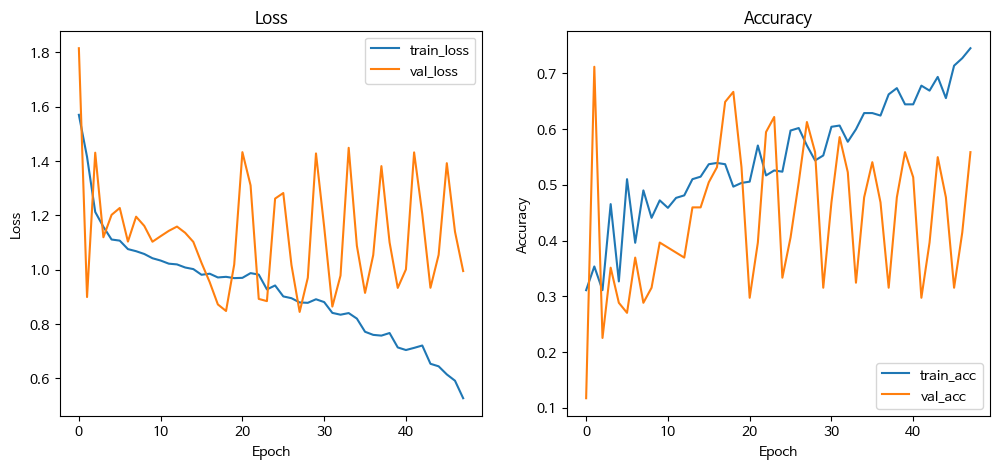

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step
              precision    recall  f1-score   support

          -1       0.69      0.82      0.75        22
           0       0.40      0.29      0.33         7
           1       0.60      0.43      0.50         7

    accuracy                           0.64        36
   macro avg       0.56      0.51      0.53        36
weighted avg       0.62      0.64      0.62        36



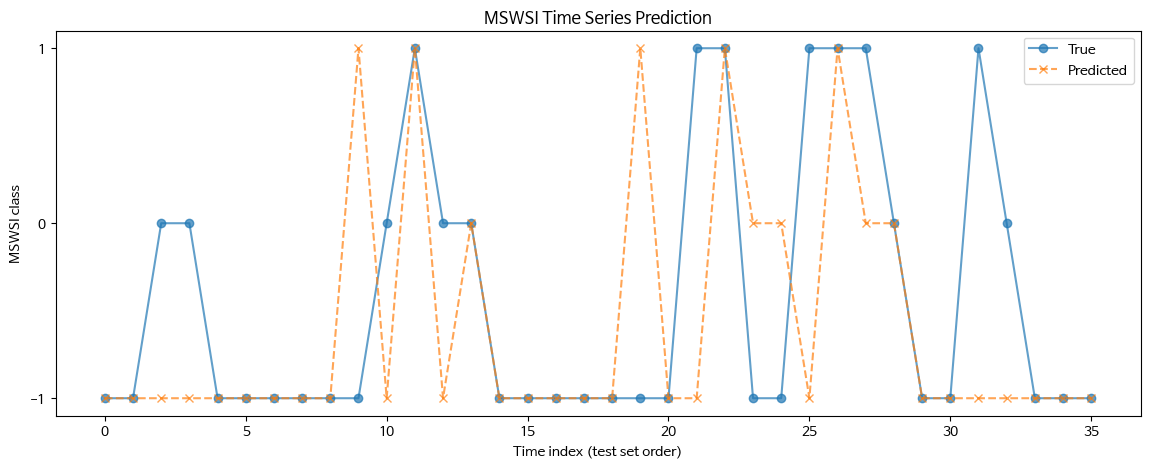

In [ ]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#  테스트 세트 성능 평가

# 예측
y_pred_prob = model.predict(X_test_win_mswsi)
y_pred_idx = y_pred_prob.argmax(axis=1)


y_true_idx = y_test_win_mswsi

# 분류 리포트 (라벨/이름 명시)
print(classification_report(
    y_true_idx, y_pred_idx,
    labels=list(range(len(le_mswsi.classes_))),
    target_names=[str(c) for c in le_mswsi.classes_]
))


# 시계열 예측 결과 시각화

y_true_lab = le_mswsi.inverse_transform(y_true_idx)
y_pred_lab = le_mswsi.inverse_transform(y_pred_idx)

plt.figure(figsize=(14,5))
plt.plot(y_true_lab, label='True', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_lab, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('MSWSI Time Series Prediction')
plt.xlabel('Time index (test set order)')
plt.ylabel('MSWSI class')
plt.legend()
plt.show()

# 가중치 조정 추가_SPI6

In [ ]:
#가중치 확인_mswsi

classes = np.unique(y_train_win_spi)
weights = compute_class_weight(class_weight='balanced',
                               classes=classes,
                               y=y_train_win_spi)
class_weight_spi = {int(c): float(w) for c, w in zip(classes, weights)}

print("SPI6 클래스별 가중치:", class_weight_spi)


SPI6 클래스별 가중치: {0: 1.7222222222222223, 1: 0.43155452436194897, 2: 9.789473684210526}


In [ ]:
#가중치 추가한 모델

# Train/Validation 분리

val_size = int(len(X_train_win_spi) * 0.2)  # 예: 20%를 검증용
X_tr, y_tr = X_train_win_spi[:-val_size], y_train_win_spi[:-val_size]
X_val, y_val = X_train_win_spi[-val_size:], y_train_win_spi[-val_size:]


#모델 정의

n_classes = len(np.unique(y_train_win_spi))
node = 512

model = Sequential()
model.add(SimpleRNN(node, input_shape=(X_train_win_spi.shape[1], X_train_win_spi.shape[2]), activation='tanh', return_sequences=True))
#model.add(SimpleRNN(node, activation='tanh', return_sequences=True))
model.add(SimpleRNN(node, activation='tanh', return_sequences=False))
#model.add(Dense(node, activation='relu'))
model.add(Dense(node, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0003),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)


#학습 (검증은 train에서 분리한 val 사용)
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[checkpoint, earlystop],
    class_weight=class_weight_spi,   # 클래스별 가중치
    verbose=1,
    shuffle=False                      # 시계열이므로 섞지 않음
)

# 최종 테스트 평가

test_loss, test_acc = model.evaluate(X_test_win_spi, y_test_win_spi, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_172 (SimpleRNN)      │ (None, 16, 512)        │       265,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_173 (SimpleRNN)      │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_178 (Dense)               │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,054,211 (4.02 MB)

 Trainable params: 1,054,211 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.5431 - loss: 1.1858
Epoch 1: val_loss improved from inf to 2.55505, saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step - accuracy: 0.5406 - loss: 1.2124 - val_accuracy: 0.0270 - val_loss: 2.5551
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.0283 - loss: 2.2368
Epoch 2: val_loss improved from 2.55505 to 0.72459, saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.0326 - loss: 2.2038 - val_accuracy: 0.8018 - val_loss: 0.7246
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.5753 - loss: 1.0378
Epoch 3: val_loss did not improve from 0.72459
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.5568 - loss: 1.0442 - val_accuracy: 0.0901 - val_loss: 1.4284
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.1164 - loss: 1.1693
Epoch 4: val_loss did not improve from 0.72459
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.11

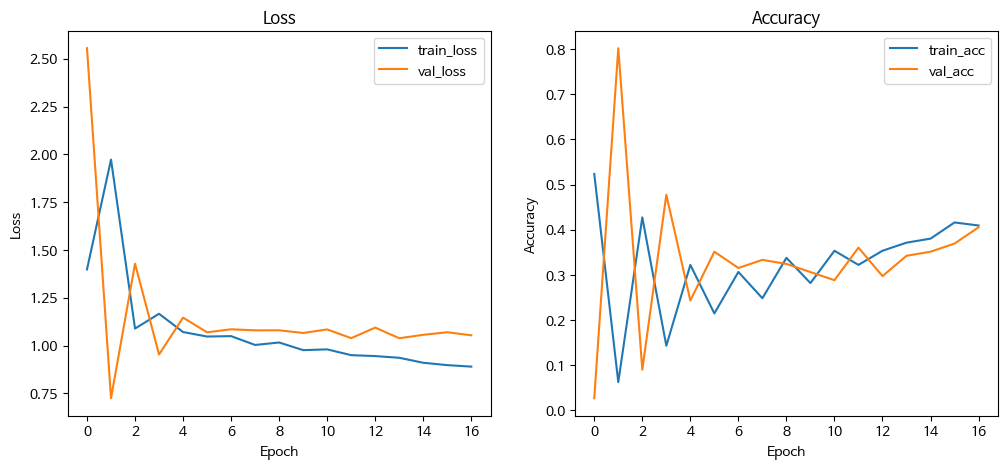

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.86      1.00      0.93        31
           1       0.00      0.00      0.00         5

    accuracy                           0.86        36
   macro avg       0.29      0.33      0.31        36
weighted avg       0.74      0.86      0.80        36



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

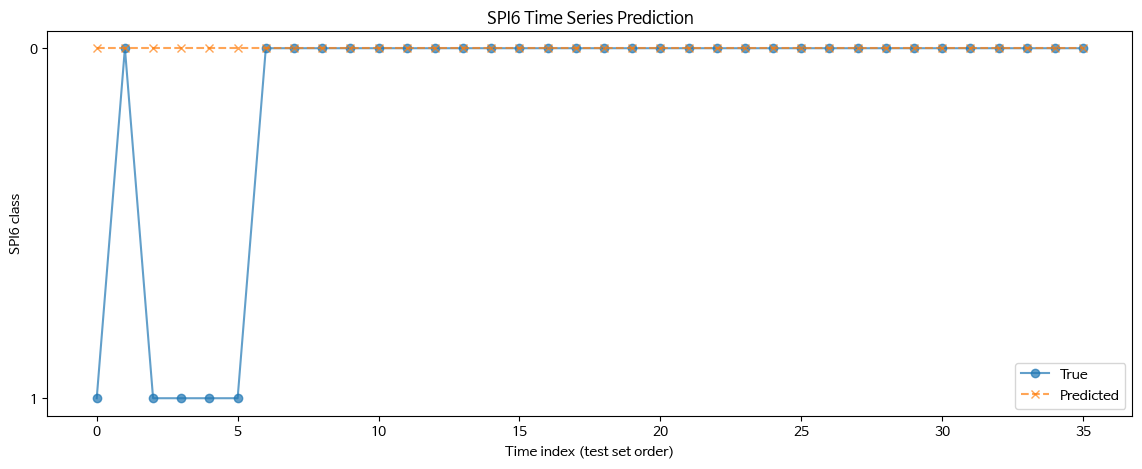

In [ ]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# 예측
y_pred_prob = model.predict(X_test_win_spi)
y_pred_idx = y_pred_prob.argmax(axis=1)


y_true_idx = y_test_win_spi

# 분류 리포트 (라벨/이름 명시)
print(classification_report(
    y_true_idx, y_pred_idx,
    labels=list(range(len(le_spi.classes_))),
    target_names=[str(c) for c in le_spi.classes_]
))


# 시계열 예측 결과 시각화

y_true_lab = le_spi.inverse_transform(y_true_idx)
y_pred_lab = le_spi.inverse_transform(y_pred_idx)

plt.figure(figsize=(14,5))
plt.plot(y_true_lab, label='True', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_lab, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('SPI6 Time Series Prediction')
plt.xlabel('Time index (test set order)')
plt.ylabel('SPI6 class')
plt.legend()
plt.show()